# IMPORTS

In [2]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing.data import QuantileTransformer
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.features import RFECV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.model_selection import ValidationCurve
from sklearn.feature_selection import RFE

# Load Data

Loads Data from Pickle File

In [5]:
listings = pd.read_pickle("listings.pkl")
X = pd.read_pickle("X.pkl")
y = pd.read_pickle("y.pkl")
X_test = pd.read_pickle("X_test.pkl")
X_train = pd.read_pickle("X_train.pkl")
y_test = pd.read_pickle("y_test.pkl")
y_train = pd.read_pickle("y_train.pkl")

# Compares Initial Models

Linear
CV accuracy: 0.80773 +/- 0.00626
Ridge
CV accuracy: 0.80779 +/- 0.00629
Lasso
CV accuracy: 0.80762 +/- 0.00630
DecisionTree
CV accuracy: 0.84888 +/- 0.00781


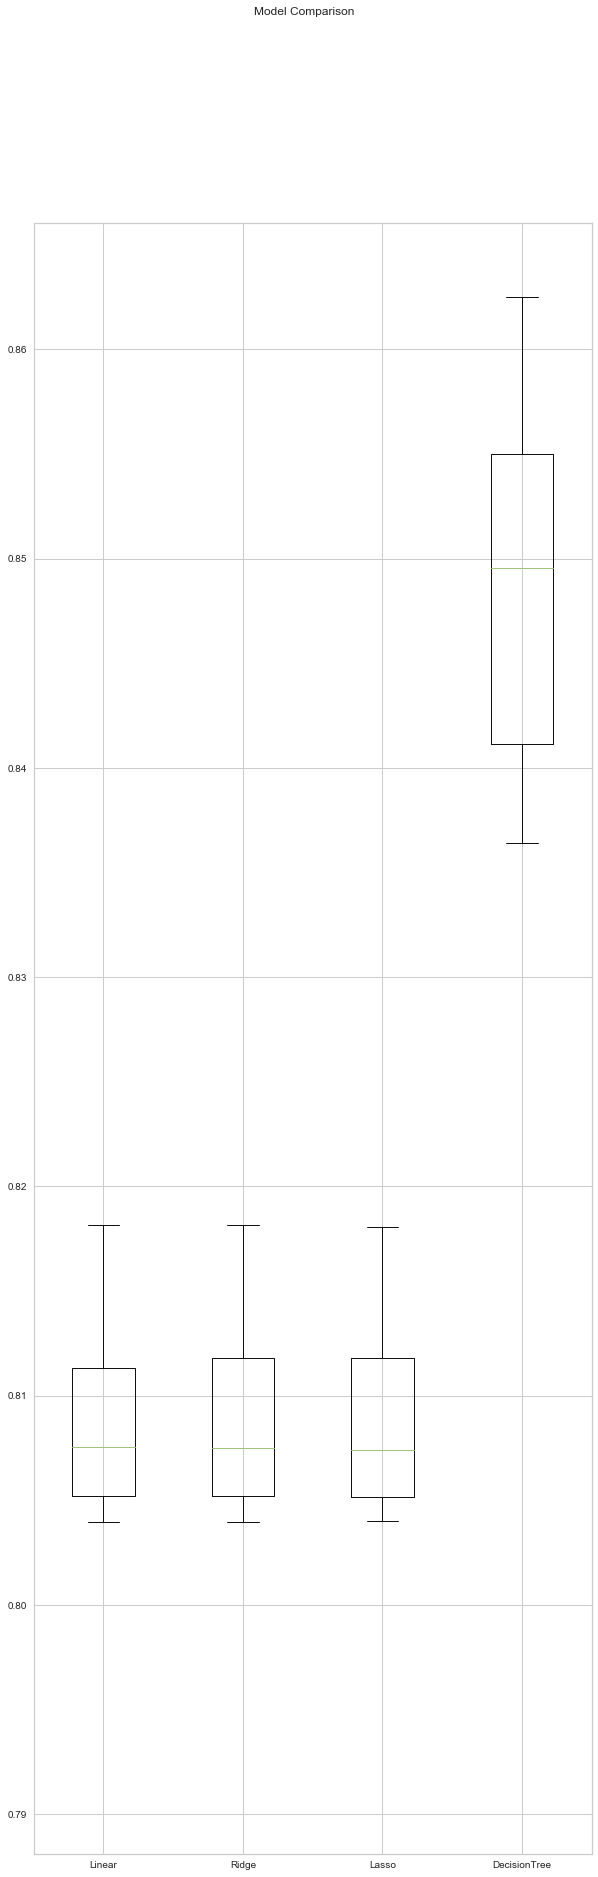

In [3]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('Ridge', RidgeCV()))
models.append(('Lasso', LassoCV(cv=5)))
models.append(('DecisionTree', DecisionTreeRegressor()))

scoring = 'r2'

results = []
names = []

res_scores = []
m_names = []
for name, model in models:
    print(name)
    pipe_mdl = make_pipeline(QuantileTransformer(),
                        model)
    kfold = model_selection.KFold(n_splits=12, random_state=42)
    scores = model_selection.cross_val_score(estimator=pipe_mdl,
                         X=X_train,
                         y=y_train,
                         cv=kfold,
                         scoring = scoring)
    print('CV accuracy: %.5f +/- %.5f' % (np.mean(scores),np.std(scores)))
    res_scores.append(scores)
    m_names.append(name)

fig = plt.figure(figsize=(10, 30))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(res_scores)
ax.set_xticklabels(m_names)
plt.show()

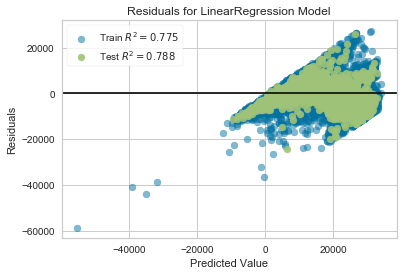

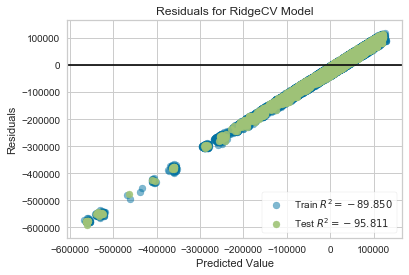

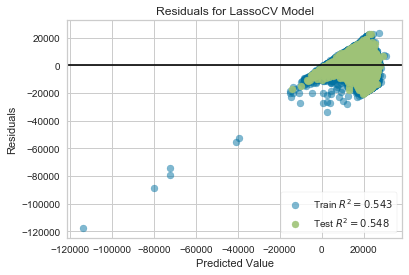

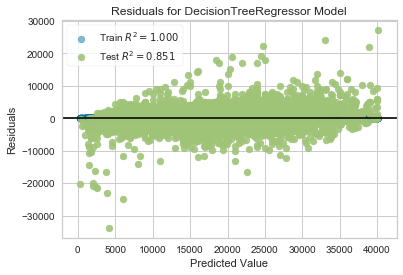

In [4]:
for name, model in models:
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()

# Feature Selection

Linear


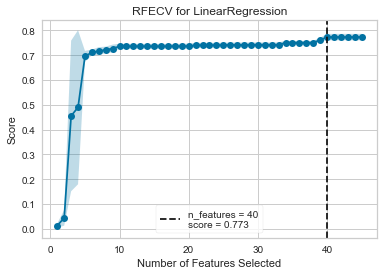

Ridge


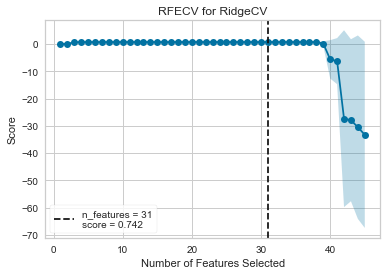

Lasso


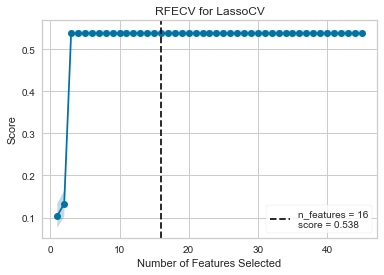

DecisionTree


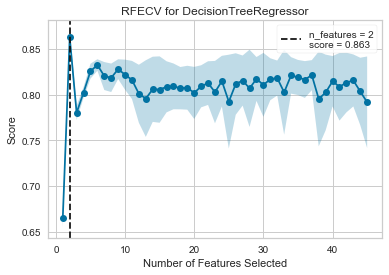

In [5]:
# Creates feature ranking visualizer to find ideal number of features for each model

for name, model in models:
    print(name)
    viz = RFECV(model, n_jobs=-1)
    viz.fit(X, y)
    viz.poof()

In [8]:
# Uses recursive feature elimination to find features to drop/include based on the ideal number of features from the above model

print('Linear')
rfe = RFE(LinearRegression(), 40)
fit = rfe.fit(X, y)
print("Num Features: ", fit.n_features_) 
print("Selected Features: ", fit.support_) 
print("Feature Ranking: ", fit.ranking_)

print('Ridge')
rfe = RFE(RidgeCV(), 31)
fit = rfe.fit(X, y)
print("Num Features: ", fit.n_features_) 
print("Selected Features: ", fit.support_) 
print("Feature Ranking: ", fit.ranking_)

print('Lasso')
rfe = RFE(LassoCV(), 16)
fit = rfe.fit(X, y)
print("Num Features: ", fit.n_features_) 
print("Selected Features: ", fit.support_) 
print("Feature Ranking: ", fit.ranking_)

print('DecisionTree')
rfe = RFE(DecisionTreeRegressor(), 2)
fit = rfe.fit(X, y)
print("Num Features: ", fit.n_features_) 
print("Selected Features: ", fit.support_) 
print("Feature Ranking: ", fit.ranking_)

Linear
Num Features:  40
Selected Features:  [ True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True False False  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
Feature Ranking:  [1 1 1 1 1 1 1 1 5 1 4 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
Ridge
Num Features:  31
Selected Features:  [ True False False  True  True  True  True  True False  True False False
  True False  True False  True False False  True  True  True  True  True
  True False False False  True False  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True]
Feature Ranking:  [ 1 10  4  1  1  1  1  1 15  1 12  3  1  2  1  8  1 11 13  1  1  1  1  1
  1  7  5  6  1 14  1  1  1  1  1  1  1  1  1  1  9  1  1  1  1]
Lasso
Num Features:  16
Selected Features:  [False  True  True  True  True  True  True  True  

In [6]:
# Recreates X_train and X_test with final features

X_train_linear = X_train[[
    'year_is',
    'miles_fs',
    'seller_comments_length',
    'options_length',
    'features_length',
    'dom_is',
    'region_code',
    'region_id',
    #'agi_stub',
    'n1',
    #'mars1',
    'mars2',
    'n2',
    'numdep',
    'ral',
    'rac',
    'elderly',
    #'a00100',
    #'a02650',
    'n26270',
    'a03220',
    'n03300',
    'n03210',
    'n03230',
    'schf',
    'n18800',
    'n19300',
    'n19700',
    'model_ss_encoded',
    #'make_ss_encoded',
    'body_type_ss_encoded',
    'vehicle_type_ss_encoded',
    'fuel_type_ss_encoded',
    'engine_size_ss_encoded',
    'transmission_ss_encoded',
    'doors_is_encoded',
    'cylinders_is_encoded',
    'interior_color_ss_encoded',
    'exterior_color_ss_encoded',
    'state_ss_encoded',
    'county_encoded',
    'fips_code_encoded',
    'msa_type_encoded',
    'msa_name_encoded',
    'cbsa_encoded'
]]

X_test_linear = X_test[[
    'year_is',
    'miles_fs',
    'seller_comments_length',
    'options_length',
    'features_length',
    'dom_is',
    'region_code',
    'region_id',
    #'agi_stub',
    'n1',
    #'mars1',
    'mars2',
    'n2',
    'numdep',
    'ral',
    'rac',
    'elderly',
    #'a00100',
    #'a02650',
    'n26270',
    'a03220',
    'n03300',
    'n03210',
    'n03230',
    'schf',
    'n18800',
    'n19300',
    'n19700',
    'model_ss_encoded',
    #'make_ss_encoded',
    'body_type_ss_encoded',
    'vehicle_type_ss_encoded',
    'fuel_type_ss_encoded',
    'engine_size_ss_encoded',
    'transmission_ss_encoded',
    'doors_is_encoded',
    'cylinders_is_encoded',
    'interior_color_ss_encoded',
    'exterior_color_ss_encoded',
    'state_ss_encoded',
    'county_encoded',
    'fips_code_encoded',
    'msa_type_encoded',
    'msa_name_encoded',
    'cbsa_encoded'
]]

X_train_ridge = X_train[[
    'year_is',
    #'miles_fs',
    #'seller_comments_length',
    'options_length',
    'features_length',
    'dom_is',
    'region_code',
    'region_id',
    #'agi_stub',
    'n1',
    #'mars1',
    #'mars2',
    'n2',
    #'numdep',
    'ral',
    #'rac',
    'elderly',
    #'a00100',
    #'a02650',
    'n26270',
    'a03220',
    'n03300',
    'n03210',
    'n03230',
    'schf',
    #'n18800',
    #'n19300',
    #'n19700',
    'model_ss_encoded',
    #'make_ss_encoded',
    'body_type_ss_encoded',
    'vehicle_type_ss_encoded',
    'fuel_type_ss_encoded',
    'engine_size_ss_encoded',
    'transmission_ss_encoded',
    'doors_is_encoded',
    'cylinders_is_encoded',
    'interior_color_ss_encoded',
    'exterior_color_ss_encoded',
    'state_ss_encoded',
    #'county_encoded',
    'fips_code_encoded',
    'msa_type_encoded',
    'msa_name_encoded',
    'cbsa_encoded'
]]

X_test_ridge = X_test[[
    'year_is',
    #'miles_fs',
    #'seller_comments_length',
    'options_length',
    'features_length',
    'dom_is',
    'region_code',
    'region_id',
    #'agi_stub',
    'n1',
    #'mars1',
    #'mars2',
    'n2',
    #'numdep',
    'ral',
    #'rac',
    'elderly',
    #'a00100',
    #'a02650',
    'n26270',
    'a03220',
    'n03300',
    'n03210',
    'n03230',
    'schf',
    #'n18800',
    #'n19300',
    #'n19700',
    'model_ss_encoded',
    #'make_ss_encoded',
    'body_type_ss_encoded',
    'vehicle_type_ss_encoded',
    'fuel_type_ss_encoded',
    'engine_size_ss_encoded',
    'transmission_ss_encoded',
    'doors_is_encoded',
    'cylinders_is_encoded',
    'interior_color_ss_encoded',
    'exterior_color_ss_encoded',
    'state_ss_encoded',
    #'county_encoded',
    'fips_code_encoded',
    'msa_type_encoded',
    'msa_name_encoded',
    'cbsa_encoded'
]]

X_train_lasso = X_train[[
    #'year_is',
    'miles_fs',
    'seller_comments_length',
    'options_length',
    'features_length',
    'dom_is',
    'region_code',
    'region_id',
    'agi_stub',
    #'n1',
    #'mars1',
    #'mars2',
    'n2',
    #'numdep',
    #'ral',
    #'rac',
    #'elderly',
    'a00100',
    #'a02650',
    #'n26270',
    #'a03220',
    #'n03300',
    #'n03210',
    #'n03230',
    #'schf',
    'n18800',
    'n19300',
    'n19700',
    'model_ss_encoded',
    'make_ss_encoded',
    'body_type_ss_encoded',
    #'vehicle_type_ss_encoded',
    #'fuel_type_ss_encoded',
    #'engine_size_ss_encoded',
    #'transmission_ss_encoded',
    #'doors_is_encoded',
    #'cylinders_is_encoded',
    #'interior_color_ss_encoded',
    #'exterior_color_ss_encoded',
    #'state_ss_encoded',
    #'county_encoded',
    #'fips_code_encoded',
    #'msa_type_encoded',
    #'msa_name_encoded',
    #'cbsa_encoded'
]]

X_test_lasso = X_test[[
    #'year_is',
    'miles_fs',
    'seller_comments_length',
    'options_length',
    'features_length',
    'dom_is',
    'region_code',
    'region_id',
    'agi_stub',
    #'n1',
    #'mars1',
    #'mars2',
    'n2',
    #'numdep',
    #'ral',
    #'rac',
    #'elderly',
    'a00100',
    #'a02650',
    #'n26270',
    #'a03220',
    #'n03300',
    #'n03210',
    #'n03230',
    #'schf',
    'n18800',
    'n19300',
    'n19700',
    'model_ss_encoded',
    'make_ss_encoded',
    'body_type_ss_encoded',
    #'vehicle_type_ss_encoded',
    #'fuel_type_ss_encoded',
    #'engine_size_ss_encoded',
    #'transmission_ss_encoded',
    #'doors_is_encoded',
    #'cylinders_is_encoded',
    #'interior_color_ss_encoded',
    #'exterior_color_ss_encoded',
    #'state_ss_encoded',
    #'county_encoded',
    #'fips_code_encoded',
    #'msa_type_encoded',
    #'msa_name_encoded',
    #'cbsa_encoded'
]]


X_train_decisiontree = X_train[[
    'year_is',
    #'miles_fs',
    #'seller_comments_length',
    #'options_length',
    #'features_length',
    #'dom_is',
    #'region_code',
    #'region_id',
    #'agi_stub',
    #'n1',
    #'mars1',
    #'mars2',
    #'n2',
    #'numdep',
    #'ral',
    #'rac',
    #'elderly',
    #'a00100',
    #'a02650',
    #'n26270',
    #'a03220',
    #'n03300',
    #'n03210',
    #'n03230',
    #'schf',
    #'n18800',
    #'n19300',
    #'n19700',
    'model_ss_encoded',
    #'make_ss_encoded',
    #'body_type_ss_encoded',
    #'vehicle_type_ss_encoded',
    #'fuel_type_ss_encoded',
    #'engine_size_ss_encoded',
    #'transmission_ss_encoded',
    #'doors_is_encoded',
    #'cylinders_is_encoded',
    #'interior_color_ss_encoded',
    #'exterior_color_ss_encoded',
    #'state_ss_encoded',
    #'county_encoded',
    #'fips_code_encoded',
    #'msa_type_encoded',
    #'msa_name_encoded',
    #'cbsa_encoded'
]]

X_test_decisiontree = X_test[[
    'year_is',
    #'miles_fs',
    #'seller_comments_length',
    #'options_length',
    #'features_length',
    #'dom_is',
    #'region_code',
    #'region_id',
    #'agi_stub',
    #'n1',
    #'mars1',
    #'mars2',
    #'n2',
    #'numdep',
    #'ral',
    #'rac',
    #'elderly',
    #'a00100',
    #'a02650',
    #'n26270',
    #'a03220',
    #'n03300',
    #'n03210',
    #'n03230',
    #'schf',
    #'n18800',
    #'n19300',
    #'n19700',
    'model_ss_encoded',
    #'make_ss_encoded',
    #'body_type_ss_encoded',
    #'vehicle_type_ss_encoded',
    #'fuel_type_ss_encoded',
    #'engine_size_ss_encoded',
    #'transmission_ss_encoded',
    #'doors_is_encoded',
    #'cylinders_is_encoded',
    #'interior_color_ss_encoded',
    #'exterior_color_ss_encoded',
    #'state_ss_encoded',
    #'county_encoded',
    #'fips_code_encoded',
    #'msa_type_encoded',
    #'msa_name_encoded',
    #'cbsa_encoded'
]]

# Hyperparameter Tuning

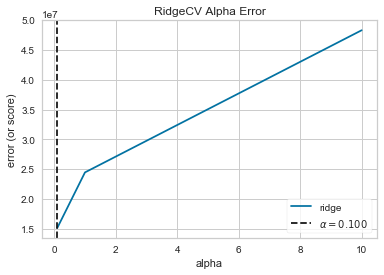

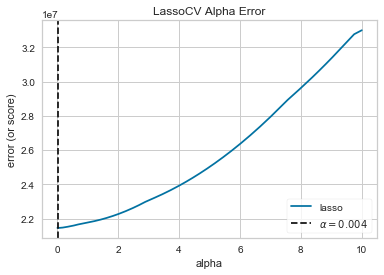

In [16]:
# Creates Alphas
alphas = np.logspace(-10, 1, 1000)

# Instantiate the linear model and visualizer
model = RidgeCV(normalize = True)
visualizer = AlphaSelection(model)

visualizer.fit(X_train_ridge, y_train)
g = visualizer.poof()

# Instantiate the Lasso model and visualizer
model = LassoCV(alphas=alphas, normalize = True)
visualizer = AlphaSelection(model)

visualizer.fit(X_train_lasso, y_train)
g = visualizer.poof()

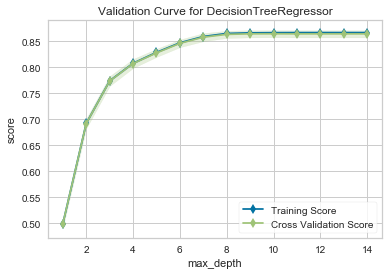

In [19]:
# Instantiate the Decision Tree model and visualizer

viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 15), cv=10, scoring="r2"
)

# Fit and poof the visualizer
viz.fit(X_train_decisiontree, y_train)
viz.poof()

# Run New Models with Final Hyperparameters and Features

In [33]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('Ridge', RidgeCV()))
models.append(('Lasso', LassoCV(cv=5)))
models.append(('DecisionTree', DecisionTreeRegressor()))

#Linear Regression Model
print('Linear Model')
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train_linear, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_linear)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mse(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(y_test, y_pred))

#Ridge Model
print('Ridge')
regr = Ridge(alpha = .1)

# Train the model using the training sets
regr.fit(X_train_ridge, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_ridge)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mse(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(y_test, y_pred))

#Lasso Model
print('Lasso')
regr = Lasso(alpha = .004)

# Train the model using the training sets
regr.fit(X_train_lasso, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_lasso)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mse(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(y_test, y_pred))

#Decision Tree Model
print('Decision Tree')
regr = DecisionTreeRegressor(max_depth = 8)

# Train the model using the training sets
regr.fit(X_train_decisiontree, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_decisiontree)

# The mean squared error
print("Mean squared error: %.2f"
      % mse(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2: %.2f' % r2_score(y_test, y_pred))

Linear Model
Coefficients: 
 [ 9.83257699e+02 -4.45635200e-02 -1.13431043e-01  1.53090423e-01
  2.60648138e-01  7.25766679e-01  5.09639589e+01  5.09639589e+01
 -2.23109121e-01 -1.94804907e-02  9.33892180e-02 -6.60716745e-02
  8.87593589e-01  5.31956708e-02  2.96300244e-01 -4.00732582e-01
 -2.63602021e+00  5.18539419e-01  3.62680227e-01  1.13996076e+00
 -2.04374322e-01  5.68256936e-02  1.19758587e-01 -1.01876136e-01
  5.21721994e+01  1.45291695e+02  9.14561776e+02 -1.87194488e+03
  3.63468155e+02 -3.28741178e+01 -1.07267734e+03  2.88764205e+02
  1.74815714e-01  4.40844538e-01 -5.16973118e+01  3.71880203e-02
  1.12554886e+00  1.72221335e+02 -5.53362556e-01  2.12606635e-01]
Mean squared error: 12252317.93
R2: 0.79
Ridge
Coefficients: 
 [ 1.46814712e+03  1.51590488e-01  2.56666652e-01  1.27117396e+00
  6.00191187e+01  6.00191183e+01 -1.66269799e-01  4.19607766e-02
  5.03870756e-01  3.44578533e-01 -3.38221210e-01 -2.19946401e+00
  4.74448531e-01  4.07287154e-01  9.55515862e-01 -6.06989233e-

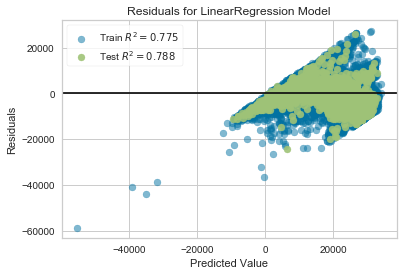

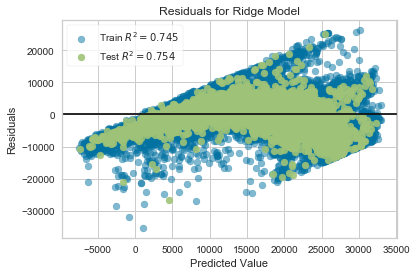

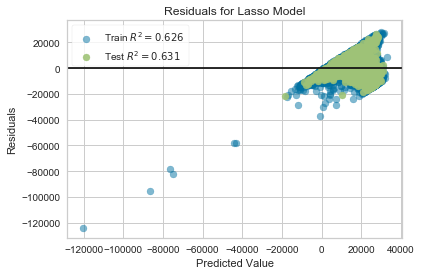

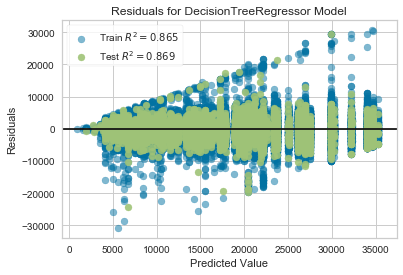

In [7]:
#Linear Model
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train_linear, y_train)
visualizer.score(X_test_linear, y_test)
visualizer.poof()

#Ridge Model
visualizer = ResidualsPlot(Ridge(alpha = .1))
visualizer.fit(X_train_ridge, y_train)
visualizer.score(X_test_ridge, y_test)
visualizer.poof()

#Lasso Model
visualizer = ResidualsPlot(Lasso(alpha = .004))
visualizer.fit(X_train_lasso, y_train)
visualizer.score(X_test_lasso, y_test)
visualizer.poof()

#Decision Tree Model
visualizer = ResidualsPlot(DecisionTreeRegressor(max_depth = 8))
visualizer.fit(X_train_decisiontree, y_train)
visualizer.score(X_test_decisiontree, y_test)
visualizer.poof()